In [21]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [22]:
Interest_rates = pd.read_csv('../resources/data/fed-rates.csv')
Interest_rates.head(10)

,date,value
0,NaN,NaN
1,1954-07-01,1.13
2,1954-07-02,1.25
3,1954-07-03,1.25
4,1954-07-04,1.25
5,1954-07-05,0.88
6,1954-07-06,0.25
7,1954-07-07,1.00
8,1954-07-08,1.25
9,1954-07-09,1.25


In [23]:
# Checking our dataframe for NaN values
print(f'There are {Interest_rates.isna().sum().sum()} NaNs in our original dataframe')

# Backfilling that single NaN
Interest_rates.fillna(method='bfill', inplace=True)

# Sanity check
print(f'There are {Interest_rates.isna().sum().sum()} NaNs after using backfill')

There are 23 NaNs in our original dataframe
There are 21 NaNs after using backfill


# Preprocessing and Cleaning Data

In [24]:
Interest_rates.dropna(inplace=True)
Interest_rates.head(10)

,date,value
0,1954-07-01,1.13
1,1954-07-01,1.13
2,1954-07-02,1.25
3,1954-07-03,1.25
4,1954-07-04,1.25
5,1954-07-05,0.88
6,1954-07-06,0.25
7,1954-07-07,1.00
8,1954-07-08,1.25
9,1954-07-09,1.25


In [25]:
Interest_rate = Interest_rates.rename(columns={'date':'DATE',' value':'Rate'})
Interest_rate.head(10)


,DATE,Rate
0,1954-07-01,1.13
1,1954-07-01,1.13
2,1954-07-02,1.25
3,1954-07-03,1.25
4,1954-07-04,1.25
5,1954-07-05,0.88
6,1954-07-06,0.25
7,1954-07-07,1.00
8,1954-07-08,1.25
9,1954-07-09,1.25


In [26]:
# prompt: # Define the start and end date range

# Convert 'DATE' column to datetime objects
Interest_rate['DATE'] = pd.to_datetime(Interest_rate['DATE'])

# Define the start and end dates
start_date = datetime(2017, 1, 1)  # Example start date
end_date = datetime(2024, 12, 31)    # Example end date

# Filter the DataFrame based on the date range
filtered_rates = Interest_rate[(Interest_rate['DATE'] >= start_date) & (Interest_rate['DATE'] <= end_date)]

filtered_rates


,DATE,Rate
22831,2017-01-01,0.55
22832,2017-01-02,0.55
22833,2017-01-03,0.66
22834,2017-01-04,0.66
22835,2017-01-05,0.66
...,...,...
24993,2024-12-24,4.33
24994,2024-12-26,4.33
24995,2024-12-27,4.33
24996,2024-12-30,4.33


In [27]:
filtered_rates['year_month'] = filtered_rates['DATE'].dt.strftime('%Y-%m')
filtered_rates.head(10)

,DATE,Rate,year_month
22831,2017-01-01,0.55,2017-01
22832,2017-01-02,0.55,2017-01
22833,2017-01-03,0.66,2017-01
22834,2017-01-04,0.66,2017-01
22835,2017-01-05,0.66,2017-01
22836,2017-01-06,0.66,2017-01
22837,2017-01-07,0.66,2017-01
22838,2017-01-08,0.66,2017-01
22839,2017-01-09,0.66,2017-01
22840,2017-01-10,0.66,2017-01


In [28]:
# Group by year and month and calculate the mean rate
grouped_rates_ym = filtered_rates.groupby(['year_month'])['Rate'].mean().reset_index()

grouped_rates_ym.head(20)


,year_month,Rate
0,2017-01,0.649677
1,2017-02,0.656786
2,2017-03,0.786129
3,2017-04,0.896000
4,2017-05,0.907419
5,2017-06,1.040000
6,2017-07,1.150645
7,2017-08,1.157097
8,2017-09,1.153333
9,2017-10,1.153871


In [29]:
Final_rates = grouped_rates_ym
Final_rates.head(10)


,year_month,Rate
0,2017-01,0.649677
1,2017-02,0.656786
2,2017-03,0.786129
3,2017-04,0.896000
4,2017-05,0.907419
5,2017-06,1.040000
6,2017-07,1.150645
7,2017-08,1.157097
8,2017-09,1.153333
9,2017-10,1.153871


# Visualization & Plotting

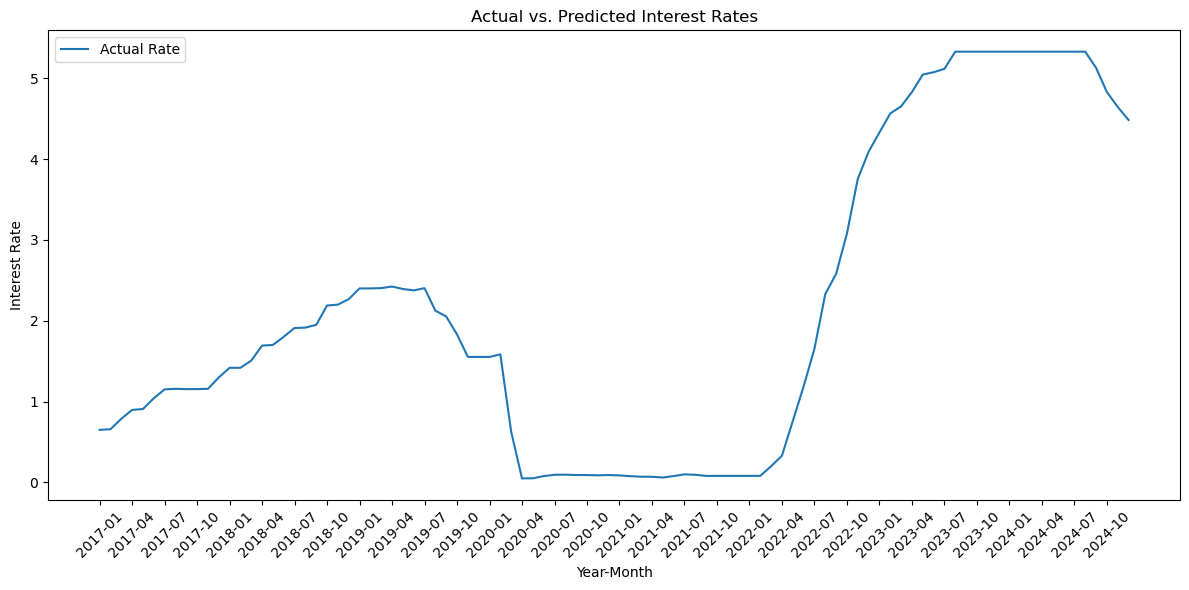

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(Final_rates['year_month'], Final_rates['Rate'], label='Actual Rate')
plt.xlabel('Year-Month')
plt.ylabel('Interest Rate')
plt.title('Actual vs. Predicted Interest Rates')
# *** Spacing out x-axis labels ***
# Select ticks at intervals of n (e.g., every 3 months)
n = 3  # Adjust this value to change the spacing
xticks_indices = np.arange(0, len(Final_rates['year_month']), n)
xticks_labels = Final_rates['year_month'][xticks_indices]

plt.xticks(xticks_indices, xticks_labels, rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

# Train the Model

In [95]:
# Train the model : Fit the model to the training data, Tune hyperparameters if needed and Use cross-validation to avoid overfitting

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data for time series splitting
X = Final_rates.index.values.reshape(-1, 1)  # Use index as a feature
y = Final_rates['Rate']

# Define the time series cross-validation splitter
tscv = TimeSeriesSplit(n_splits=5)

# Define the model and parameter grid for hyperparameter tuning (example)
model = LinearRegression()
param_grid = {'fit_intercept': [True, False]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best model and its predictions
best_model = grid_search.best_estimator_
Final_rates['Predicted_Rate'] = best_model.predict(X)

# Evaluate the model (example using RMSE)
rmse = np.sqrt(mean_squared_error(Final_rates['Rate'], Final_rates['Predicted_Rate']))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 1.4883655549320385


# Evaluate the Model


KNN Regression Metrics:
Root Mean Squared Error (RMSE): 0.10639204252140455
Mean Absolute Error (MAE): 0.06049955788103217
R-squared (R2): 0.9968781474934493


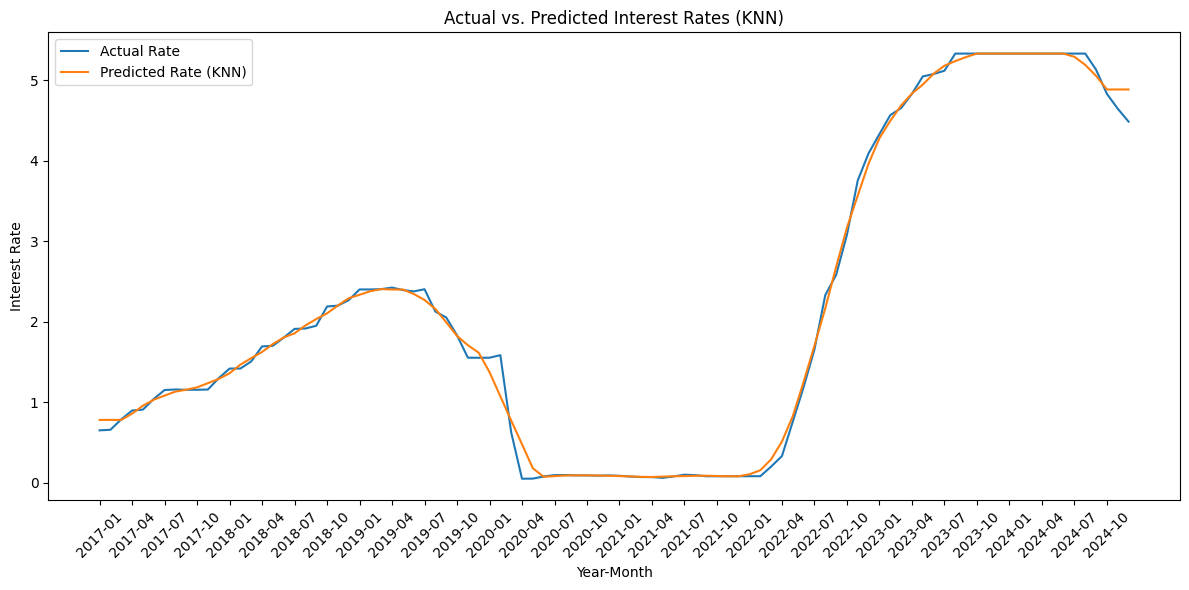

In [97]:
# Evaluate the model: use metrics like liner regression and KNN

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# ... (Your existing code) ...

# KNN Regression
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can tune the number of neighbors
knn_model.fit(X, y)
Final_rates['Predicted_Rate_KNN'] = knn_model.predict(X)

# Evaluate KNN model
rmse_knn = np.sqrt(mean_squared_error(Final_rates['Rate'], Final_rates['Predicted_Rate_KNN']))
mae_knn = mean_absolute_error(Final_rates['Rate'], Final_rates['Predicted_Rate_KNN'])
r2_knn = r2_score(Final_rates['Rate'], Final_rates['Predicted_Rate_KNN'])

print(f"\nKNN Regression Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse_knn}")
print(f"Mean Absolute Error (MAE): {mae_knn}")
print(f"R-squared (R2): {r2_knn}")

# Plot actual vs. predicted values for KNN
plt.figure(figsize=(12, 6))
plt.plot(Final_rates['year_month'], Final_rates['Rate'], label='Actual Rate')
plt.plot(Final_rates['year_month'], Final_rates['Predicted_Rate_KNN'], label='Predicted Rate (KNN)')
plt.xlabel('Year-Month')
plt.ylabel('Interest Rate')
plt.title('Actual vs. Predicted Interest Rates (KNN)')

plt.xticks(xticks_indices, xticks_labels, rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


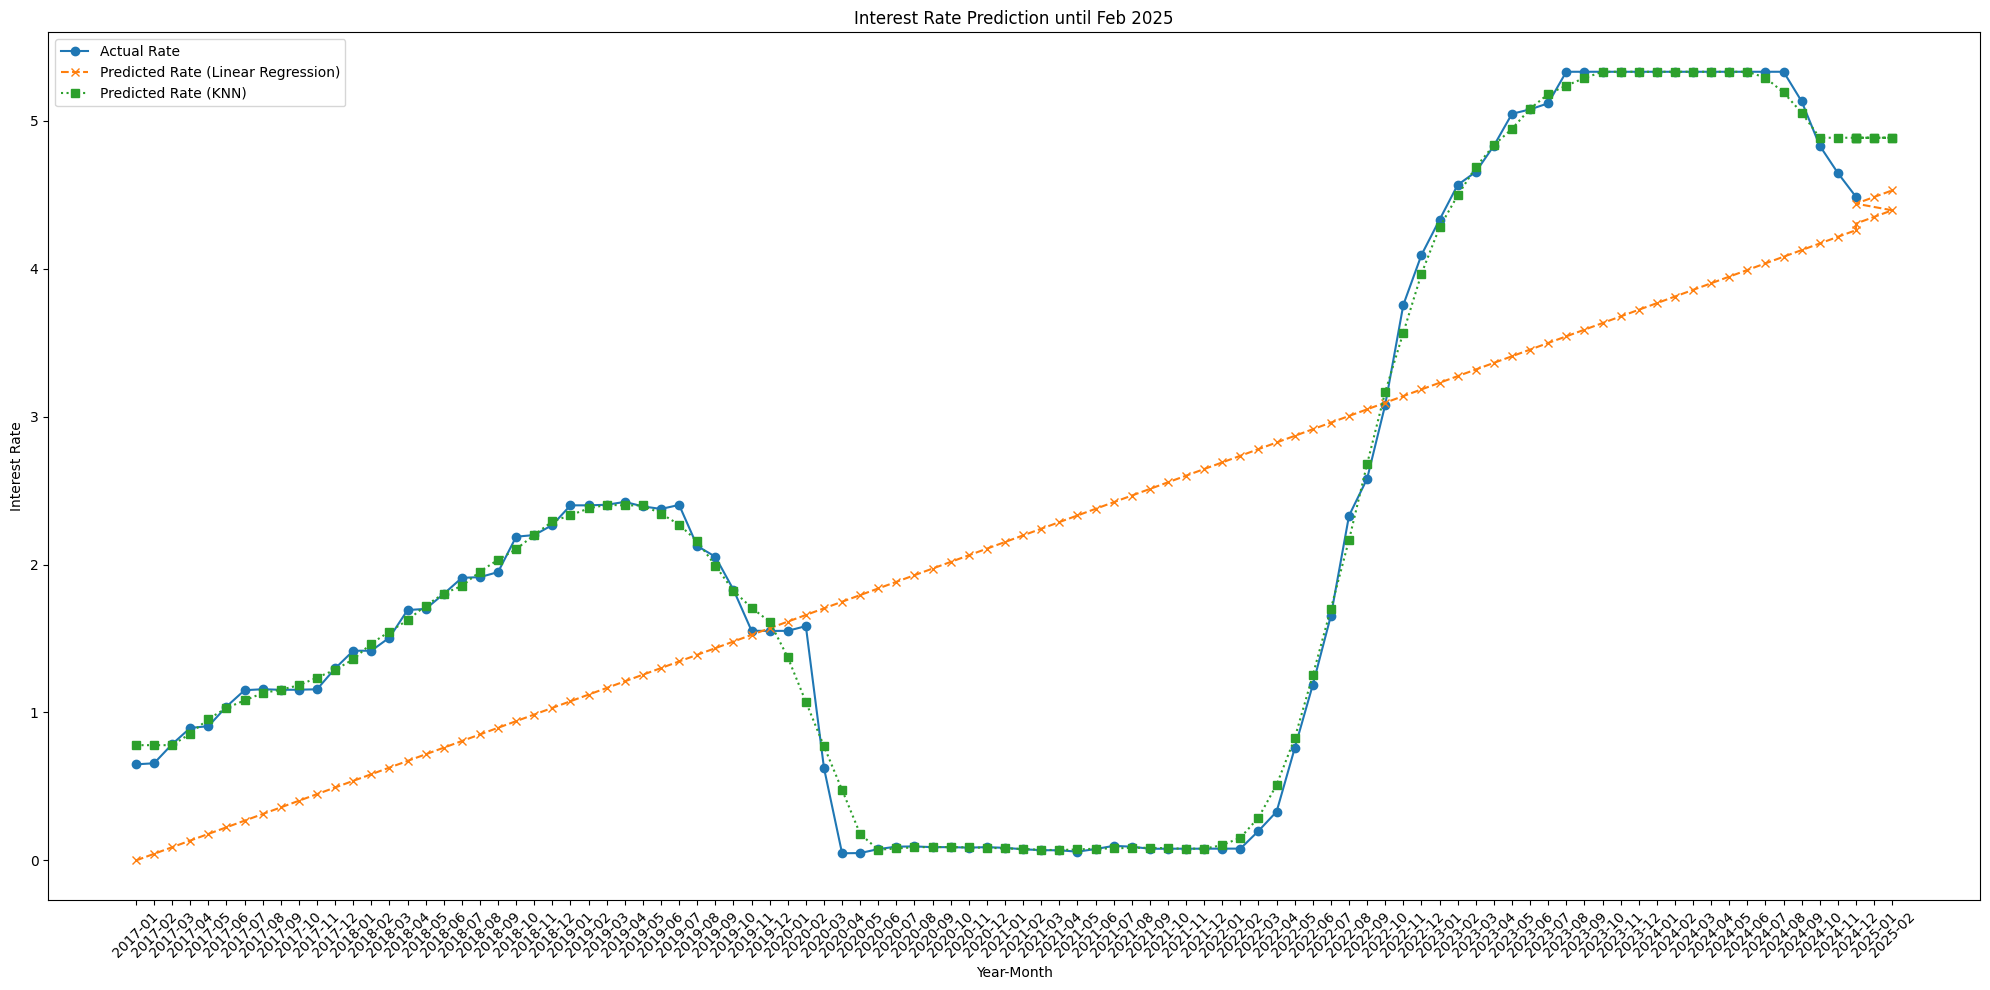

,year_month,Predicted_Rate,Predicted_Rate_KNN
0,2024-12,4.438719,4.88411
1,2025-01,4.483555,4.88411
2,2025-02,4.528390,4.88411


In [99]:
# Can you predict the model to Feb 2025 ?

# Create future dates for prediction
future_dates = pd.date_range(start='2024-12-01', end='2025-02-01', freq='MS')
future_df = pd.DataFrame({'DATE': future_dates})
future_df['year_month'] = future_df['DATE'].dt.strftime('%Y-%m')

# Prepare future data for prediction (use the same feature as before: index)
future_X = np.arange(len(Final_rates), len(Final_rates) + len(future_dates)).reshape(-1, 1)


# Predict using the best model from GridSearchCV (Linear Regression)
future_predictions = best_model.predict(future_X)

# Predict using KNN model
future_predictions_knn = knn_model.predict(future_X)


# Create a DataFrame for future predictions
future_predictions_df = pd.DataFrame({'year_month': future_df['year_month'],
                                      'Predicted_Rate': future_predictions,
                                      'Predicted_Rate_KNN': future_predictions_knn})

# Combine with existing data
Final_rates = pd.concat([Final_rates, future_predictions_df], ignore_index=True)

# Plot the predictions
plt.figure(figsize=(20, 10))
plt.plot(Final_rates['year_month'], Final_rates['Rate'], label='Actual Rate', marker='o')
plt.plot(Final_rates['year_month'], Final_rates['Predicted_Rate'], label='Predicted Rate (Linear Regression)', linestyle='--', marker='x')
plt.plot(Final_rates['year_month'], Final_rates['Predicted_Rate_KNN'], label='Predicted Rate (KNN)', linestyle=':', marker='s')

plt.xlabel('Year-Month')
plt.ylabel('Interest Rate')
plt.title('Interest Rate Prediction until Feb 2025')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

future_predictions_df


In [ ]:


# Plot the predictions
plt.figure(figsize=(20, 10))
plt.plot(Final_rates['year_month'], Final_rates['Rate'], label='Actual Rate', marker='o')
plt.plot(Final_rates['year_month'], Final_rates['Predicted_Rate'], label='Predicted Rate (Linear Regression)', linestyle='--', marker='x')
plt.plot(Final_rates['year_month'], Final_rates['Predicted_Rate_KNN'], label='Predicted Rate (KNN)', linestyle=':', marker='s')

plt.xlabel('Year-Month')
plt.ylabel('Interest Rate')
plt.title('Interest Rate Prediction until Feb 2025')
plt.legend()


# *** Spacing out x-axis labels ***
# Select ticks at intervals of n (e.g., every 3 months)
n = 3  # Adjust this value to change the spacing
xticks_indices = np.arange(0, len(Final_rates['year_month']), n)
xticks_labels = Final_rates['year_month'][xticks_indices]

plt.xticks(xticks_indices, xticks_labels, rotation=45)  # Rotate for better readability


plt.tight_layout()
plt.show()

future_predictions_df

In [ ]:


import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor


# Load data (assuming 'fed-rates.csv' is in the correct location)
Interest_rates = pd.read_csv('/content/fed-rates.csv')
Interest_rates.dropna(inplace=True)
Interest_rate = Interest_rates.rename(columns={'date': 'DATE', ' value': 'Rate'})
Interest_rate['DATE'] = pd.to_datetime(Interest_rate['DATE'])

# Filter data
start_date = datetime(2017, 1, 1)
end_date = datetime(2024, 12, 31)
filtered_rates = Interest_rate[(Interest_rate['DATE'] >= start_date) & (Interest_rate['DATE'] <= end_date)]

# Feature Engineering (using time index as feature)
filtered_rates['year_month'] = filtered_rates['DATE'].dt.strftime('%Y-%m')
grouped_rates_ym = filtered_rates.groupby(['year_month'])['Rate'].mean().reset_index()

Final_rates = grouped_rates_ym

# Data Scaling
scaler = MinMaxScaler()
Final_rates['Rate_scaled'] = scaler.fit_transform(Final_rates[['Rate']])

# Prepare data for modeling
X = np.arange(len(Final_rates)).reshape(-1, 1)  # Use numerical index as the feature
y = Final_rates['Rate_scaled']


# Time Series Split
tscv = TimeSeriesSplit(n_splits=5)


# Model Selection and Optimization (Example: RandomForestRegressor)
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}
grid_search = GridSearchCV(model, param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

best_model = grid_search.best_estimator_
Final_rates['Predicted_Rate_scaled'] = best_model.predict(X)

# Inverse Transform for actual values
Final_rates['Predicted_Rate'] = scaler.inverse_transform(Final_rates[['Predicted_Rate_scaled']])


# Evaluation
rmse = np.sqrt(mean_squared_error(Final_rates['Rate'], Final_rates['Predicted_Rate']))
mae = mean_absolute_error(Final_rates['Rate'], Final_rates['Predicted_Rate'])
r2 = r2_score(Final_rates['Rate'], Final_rates['Predicted_Rate'])

print(f"RandomForest Regression Metrics:")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")



# Future Prediction
future_dates = pd.date_range(start='2024-12-01', end='2025-02-01', freq='MS')
future_df = pd.DataFrame({'DATE': future_dates})
future_df['year_month'] = future_df['DATE'].dt.strftime('%Y-%m')

future_X = np.arange(len(Final_rates), len(Final_rates) + len(future_dates)).reshape(-1, 1)
future_predictions_scaled = best_model.predict(future_X)
future_predictions = scaler.inverse_transform(future_predictions_scaled.reshape(-1, 1))

future_predictions_df = pd.DataFrame({'year_month': future_df['year_month'],
                                     'Predicted_Rate': future_predictions.flatten()})


# Concatenate predictions
Final_rates = pd.concat([Final_rates, future_predictions_df], ignore_index=True)

#Plotting
n = 3
xticks_indices = np.arange(0, len(Final_rates['year_month']), n)
xticks_labels = Final_rates['year_month'][xticks_indices]

plt.figure(figsize=(12, 6))
plt.plot(Final_rates['year_month'], Final_rates['Rate'], label='Actual', marker='o')
plt.plot(Final_rates['year_month'], Final_rates['Predicted_Rate'], label='Predicted', linestyle='--', marker='x')
plt.xlabel('Year-Month')
plt.ylabel('Interest Rate')
plt.title('Interest Rate Prediction')
plt.legend()
plt.xticks(xticks_indices, xticks_labels, rotation=45)
plt.tight_layout()
plt.show()


In [ ]:


# ... (Your existing code) ...

# Function to monitor model performance
def monitor_model(model, X, y, future_X):
    """
    Monitors model performance and provides insights on model drift.

    Args:
        model: The trained model.
        X: The feature data for training.
        y: The target variable for training.
        future_X: The feature data for future predictions.

    Returns:
        A dictionary containing metrics and insights.
    """
    predictions = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)

    future_predictions = model.predict(future_X)

    monitoring_results = {
        "rmse": rmse,
        "mae": mae,
        "r2": r2,
        "future_predictions": future_predictions,
        # Add other relevant metrics or insights here, e.g. distribution comparison
    }

    return monitoring_results


# Example usage (assuming you have your best_model, X, y, and future_X)
monitoring_info = monitor_model(best_model, X, y, future_X)
print(monitoring_info)


# Function to maintain the model (retraining)
def maintain_model(new_data, model, X, y):
    """
    Maintains the model by retraining it with new data.

    Args:
        new_data: The new data to incorporate for retraining.
        model: The trained model to update.
        X: The original feature data.
        y: The original target variable.
    """
    # Concatenate new data to existing data
    updated_X = np.concatenate((X, new_data[['index']].values), axis=0)
    updated_y = np.concatenate((y, new_data['Rate_scaled'].values), axis=0)

    # Retrain the model using updated data
    model.fit(updated_X, updated_y)

    print("Model retrained with new data.")
    return model

# Example of how to use maintain_model:
# Assume new_data is a dataframe containing your new data
# new_data = ...
# best_model = maintain_model(new_data, best_model, X, y)

